In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Ariel']
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '25'
mpl.rcParams['ytick.labelsize'] = '25'

In [4]:
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord

In [3]:
color_map = {
    'cyan': '#66c2a5',
    'orange': '#ff7f00',
    'blue': '#8da0cb',
    'purple': '#7570b3',
    'pink': '#fccde5',
    'green': '#33a02c',
    'yellow': '#ffd92f',
    'brown': '#e5c494',
    'magenta': '#f1598a',
    'grey': '0.3',
    'deeppurple': '#984ea3',
    'deepblue': '#377eb8'
}

In [16]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [43]:
hist = np.empty(8)

In [44]:
# 20jgb
coord_host = SkyCoord(268.302773100, -0.856122240, unit="deg")
coord = SkyCoord(268.3027999, -0.8560435, unit="deg")
D_A = np.loadtxt('../lc/20jgb_peculiar.dat')[7]  #H0 = 70
D_A0 = cosmo.angular_diameter_distance(z=0.0307)
print(D_A, D_A0)
print(coord_host.separation(coord).to("rad").value * (
    D_A * 1e3))
hist[0] = coord_host.separation(coord).to("rad").value * (
    D_A * 1e3)

128.05 126.67738725500004 Mpc
0.18588713789806133


In [46]:
# 18byg
coord_host = SkyCoord(185.846751145, 46.602961169, unit="deg")
coord = SkyCoord(185.839837, 46.602272, unit="deg")
D_A = np.loadtxt('../lc/18byg_peculiar.dat')[7]  #H0 = 70
D_A0 = cosmo.angular_diameter_distance(z=0.06633826)
print(D_A, D_A0)
print(coord_host.separation(coord).to("rad").value * (D_A * 1e3))
hist[1] = coord_host.separation(coord).to("rad").value * (
    D_A * 1e3)

265.67 262.4057484875611 Mpc
22.257292614513197


In [47]:
# 16jhr
coord_host = SkyCoord(184.583692267, 0.255956159, unit="deg")
coord = SkyCoord(184.582708, 0.254828, unit="deg")
D_A = cosmo.angular_diameter_distance(z=0.11737).to('kpc').value
print(coord_host.separation(coord).to("rad").value * D_A)
hist[2] = coord_host.separation(coord).to("rad").value * D_A

11.437957058181466


In [74]:
# 19ofm
coord_host = SkyCoord(222.730961705, 27.578530628, unit="deg")
coord = SkyCoord(222.72762123333, 27.5826173, unit="deg")
D_A = np.loadtxt('../lc/19ofm_peculiar.dat')[7]
D_A0 = cosmo.angular_diameter_distance(z=0.030254)
print(D_A, D_A0)
print(coord_host.separation(coord).to("rad").value * D_A * 1e3)
hist[3] = coord_host.separation(coord).to("rad").value * D_A * 1e3

124.74 124.90387837709304 Mpc
10.986948095145666


In [86]:
# 16hnk
coord_host = SkyCoord(33.315839646, -7.661854477, unit="deg")
coord = SkyCoord(33.3193, -7.6613, unit="deg")
D_A0 = cosmo.angular_diameter_distance(z=0.01610)
D_A = np.loadtxt('../lc/16hnk_peculiar.dat')[7]  #H0 = 70
print(D_A, D_A0)
print(coord_host.separation(coord).to("rad").value * D_A * 1e3)
hist[4] = coord_host.separation(coord).to("rad").value * D_A * 1e3

65.52 67.61306069116021 Mpc
3.9726543779278174


In [67]:
# 18aoz
coord_host = SkyCoord(177.757059, -28.806017, unit="deg")
coord = SkyCoord(177.757625, -28.744064, unit="deg")
D_A = np.loadtxt('../lc/18aoz_peculiar.dat')[7]  #H0 = 70
print(coord_host.separation(coord).to("rad").value * D_A * 1e3)
hist[5] = coord_host.separation(coord).to("rad").value * D_A * 1e3

22.62118301298929


In [68]:
hist[6] = 15.4 # SN 2016dsg
hist[7] = 45 # OGLE-013-SN-079

Text(0, 0.5, 'Cumulative fraction')

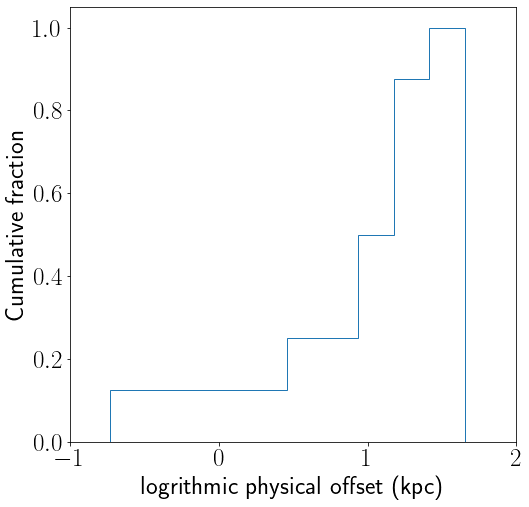

In [88]:
plt.figure(figsize=(8, 8))
plt.hist(np.log10(hist[:]), histtype='step', cumulative=True, density=True)
#plt.xscale('log')
plt.xlim(-1, 2)
plt.xlabel('logrithmic physical offset (kpc)')
plt.ylabel('Cumulative fraction')